# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/spambase.csv` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [29]:
#from __future__ import print_function, division
from __future__ import division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [2]:
# Your code goes here
def loadDataSet(name):
    data_path = os.path.join(os.getcwd(), 'datasets', name + '.csv')
    return pd.read_csv(data_path, delimiter = ',')

partA = loadDataSet('train_20news_partA')
partB = loadDataSet('train_20news_partB')

print(partA.head())
partB.head()

   w1_aaa  w2_pins  w3_kmr  w4_notion  w5_queens  w6_dwyer  w7_defenseman  \
0       1        1       1          1          1         1              1   
1       1        1       1          1          1         1              1   
2       1        1       1          1          1         1              1   
3       1        1       1          1          1         1              1   
4       1        1       1          1          1         1              1   

   w8_gld  w9_tocchet  w10_home  ...    w512_constantly  w513_generate  \
0       1           1         1  ...                  1              5   
1       1           1         1  ...                  2              3   
2       1           1         2  ...                  4              2   
3       1           1         1  ...                  6              3   
4       1           1         1  ...                  6              1   

   w514_definite  w515_lacks  w516_combination  w517_sitting  w518_surface  \
0             

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,0,0,0,0,0,0,0,0,0,0,...,0,4,2,5,7,3,5,3,7,4
1,0,0,0,0,0,0,0,0,0,0,...,1,2,5,7,2,3,4,5,4,4
2,0,0,0,0,0,0,0,0,0,1,...,3,1,5,4,1,4,4,6,7,2
3,0,0,0,0,0,0,0,0,0,0,...,5,2,5,0,0,7,0,7,3,3
4,0,0,0,0,0,0,0,0,0,0,...,5,0,6,7,5,2,0,7,3,3


### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [3]:
# Your code goes here
print "number of columns"
print len(partA.columns.tolist())

print 
#print np.all() partA.dtypes
mainType = partA.dtypes[0] #'int64'
#print type(mainType)

print "are all of type " + str(mainType) + " ?"
print np.all(
    np.apply_along_axis(lambda x: x == mainType, axis=0, arr = partA.dtypes)
)

print

partA.info()

number of columns
521

are all of type int64 ?
True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 9.0 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

*Your answer goes here*

In [4]:
print "number of data points are number of lines"
print len(partA)

print

print "number of attributes are number of columns except the last column which is the output"
print partA.shape[1] - 1

number of data points are number of lines
2257

number of attributes are number of columns except the last column which is the output
520


### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [5]:
# Your code goes here
partA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,...,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,4.894550,5.810368,5.829863,5.293753,5.265840,5.837838,5.370846,5.804165,5.689411,5.367302,...,9.388126,8.941515,8.808152,9.117412,8.911830,9.410722,8.574214,9.419140,9.036774,3.091715
std,37.202621,44.876796,45.328601,39.789073,39.812328,44.657020,39.976914,44.460305,43.007789,39.609623,...,44.542075,42.701889,39.807593,42.590600,41.200456,45.952422,38.224780,44.875752,43.779984,1.395918
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.000000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

In [6]:
# Your code goes here
partA.head(n=7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [7]:
# Your code goes here
partA.columns.tolist()[0:100]

['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home',
 'w11_buying',
 'w12_internet',
 'w13_slots',
 'w14_compatible',
 'w15_transfer',
 'w16_baltimore',
 'w17_mean',
 'w18_person',
 'w19_performance',
 'w20_support',
 'w21_tor',
 'w22_gm',
 'w23_mouse',
 'w24_base',
 'w25_population',
 'w26_bob',
 'w27_set',
 'w28_it',
 'w29_earth',
 'w30_faith',
 'w31_steve',
 'w32_caps',
 'w33_printer',
 'w34_east',
 'w35_cable',
 'w36_adapter',
 'w37_mss',
 'w38_catcher',
 'w39_bullpen',
 'w40_obp',
 'w41_innocent',
 'w42_european',
 'w43_angeles',
 'w44_settings',
 'w45_words',
 'w46_rit',
 'w47_shots',
 'w48_ports',
 'w49_vga',
 'w50_coverage',
 'w51_jumpers',
 'w52_bases',
 'w53_sea',
 'w54_pts',
 'w55_behavior',
 'w56_domi',
 'w57_sabres',
 'w58_yzerman',
 'w59_messier',
 'w60_goalies',
 'w61_hawks',
 'w62_our',
 'w63_sx',
 'w64_view',
 'w65_hitters',
 'w66_richard',
 'w67_point',
 'w68_nyi',
 'w69_mvp',
 'w70_kill',


### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

Axes(0.125,0.125;0.775x0.775)


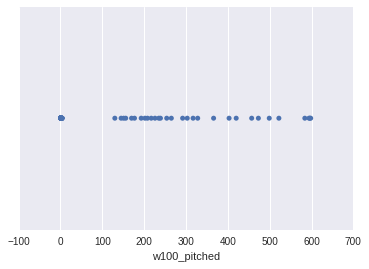

In [8]:
ax = sns.stripplot(partA['w100_pitched'])
print ax

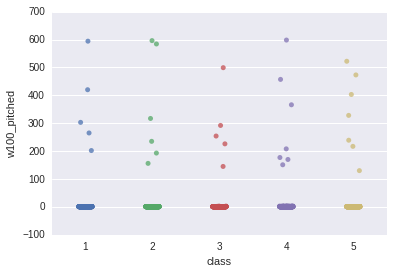

In [9]:
# Your code goes here
#https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html

ax = sns.stripplot(x = 'class', y='w100_pitched', data = partA, jitter = True, alpha=.75)

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [10]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

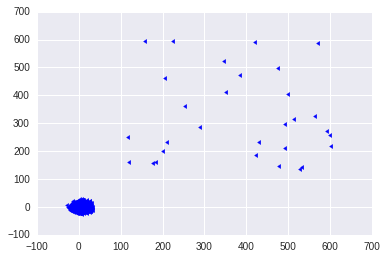

In [11]:
# Your code goes here

scatter_jitter(partA['w99_det'], partA['w100_pitched'])

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [12]:
# Your code goes here
#def getQuartile(arr, q):
#    """https://en.wikipedia.org/wiki/Quartile"""
#    if q==1 | q==2 | q==3:
#        if q==1:
#            pass
#    else:
#        raise "q parameter is not valid"
        
def getBoundaries(col, k=1.5, median=True):
    """alternative use k=3 for data that are far out
    the theory says to work with medians but this does not work always"""

    #mean
    #getQuartile(partA['w100_pitched'], 1)

    sortedList = col.sort_values(ascending=True).as_matrix()

    #sortedList = np.array([1, 5, 6])

    lenList = len(sortedList)
    #print lenList/2

    if lenList % 2 == 1:
        #sortedList.drop()
        ind = int(lenList/2)
        mylist = np.delete(sortedList, ind) #plus one is not necessary
        #mylist = sortedList.drop(sortedList.index[[ind]])
    else:
        mylist = sortedList

    halfway = int(len(mylist)/2)
    lowerhalf = mylist[:halfway]
    upperhalf = mylist[halfway:]
        
    q1 = np.median(lowerhalf) if median else np.mean(lowerhalf)
    q3 = np.median(upperhalf) if median else np.mean(upperhalf)


    #q1 - k(q3 - q1), q3 + k(q3-q1)
    lowbound, highbound = int(q1 - k*(q3 - q1)), int(q3 + k*(q3 - q1))

    #len(lowerhalf), len(upperhalf)
    #q1, q3
    return lowbound, highbound

#q3 = sortedList[:int(len(sortedList)/4)]
#q1 = sortedList[int(len(sortedList)*3/4):]

#len(q1), len(q3)


In [13]:
lowBound, highBound = getBoundaries(partA['w100_pitched'], median=False)
lowBound, highBound

(-11, 22)

In [14]:
def getBoundariesWithoutNegatives(col, k=1.5, median=True):
    lowBound, highBound = getBoundaries(col, k, median)
    
    return (lowBound if lowBound >= 0 else 0, highBound if highBound >=0 else 0)

In [15]:
lowBound, highBound = getBoundariesWithoutNegatives(partA['w100_pitched'], median=False)
lowBound, highBound

(0, 22)

In [16]:
#def test(input):
#    print input
#    print
#    pass

data = partA.copy()

features = data.copy()

classCol = features['class']
del features['class']
#print len(features.columns.tolist())
#print classCol.head()


#partA_clean[0:2].apply(test, axis=0) #we want the columns
bounds = features.apply(lambda col: getBoundariesWithoutNegatives(col, median=False), axis=0)
#len(partA_clean.columns.tolist())
bounds

w1_aaa              (0, 20)
w2_pins             (0, 25)
w3_kmr              (0, 25)
w4_notion           (0, 22)
w5_queens           (0, 22)
w6_dwyer            (0, 25)
w7_defenseman       (0, 22)
w8_gld              (0, 25)
w9_tocchet          (0, 24)
w10_home            (0, 22)
w11_buying          (0, 22)
w12_internet        (0, 20)
w13_slots           (0, 25)
w14_compatible      (0, 24)
w15_transfer        (0, 25)
w16_baltimore       (0, 25)
w17_mean            (0, 22)
w18_person          (0, 25)
w19_performance     (0, 24)
w20_support         (0, 23)
w21_tor             (0, 23)
w22_gm              (0, 25)
w23_mouse           (0, 25)
w24_base            (0, 22)
w25_population      (0, 23)
w26_bob             (0, 25)
w27_set             (0, 26)
w28_it              (0, 35)
w29_earth           (0, 25)
w30_faith           (0, 24)
                     ...   
w491_apple          (0, 24)
w492_nhl            (0, 22)
w493_he             (0, 26)
w494_season         (0, 27)
w495_baseball       

In [17]:
def removeOutlierDataPoints(data, bounds):
    """bounds are a series of boundaries and data is a dataset matrix"""
    curDict = bounds.to_dict()
    
    for curColName in curDict:
        curBounds = curDict[curColName]
        #print curBounds
        curCol = data[curColName].values
        
        #print len(curCol)
        fatalRowInds = []
        
        for rowInd in range(len(data)):
            #print rowInd
            curValue = curCol[rowInd]
            #print curValue
            if (curValue < curBounds[0]) or (curBounds[1] < curValue): #outlier detected
                fatalRowInds += [rowInd]
        #print curBounds[0]
        #print curBounds[1]
        
        #print fatalRowInds
        data.drop(data.index[fatalRowInds], inplace=True)
        #for i in fatalRowInds:

In [18]:
cleanData = data.copy()

removeOutlierDataPoints(cleanData, bounds)
#type(bounds)
#bounds.loc['w2_pins]
#type()
print "this leaves us with only a handful of points that satisfy the strict criteria set above if we would use median"
len(cleanData)

this leaves us with only a handful of points that satisfy the strict criteria set above if we would use median


2186

In [19]:
cleanData.head()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3


### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [20]:
# Your code goes here
print "used to have that many data"
print len(data)
print

print "now we have that many after removing outliers"
print len(cleanData)
print

print "we have removed that many outliers"
len(data) - len(cleanData)

used to have that many data
2257

now we have that many after removing outliers
2186

we have removed that many outliers


71

let's verify by replotting


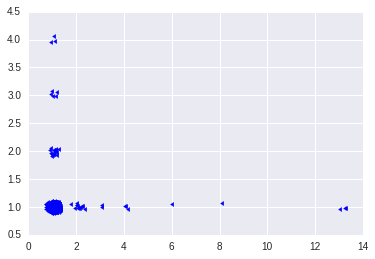

In [21]:
print "let's verify by replotting"

scatter_jitter(cleanData['w99_det'], cleanData['w100_pitched'])

## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

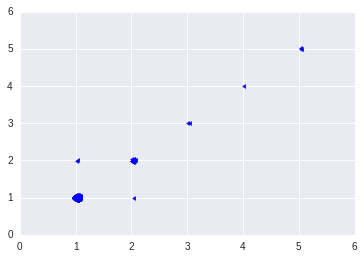

In [22]:
# Your code goes here
scatter_jitter(cleanData['w281_ico'], cleanData['w273_tek'], jitter=0.1)

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

*Your answer goes here:*

These two features are highly correlated

Unfortunately we have to make the assumption that the features are independent to each other even though we just saw an example of the contrary

The main issue if we do not make this assumption is that we cannot split the probabilities by the product. We would use the chain rule
```
P(x1,x2,...,xd/y) = Π (P(xi/x1,x2,xi-1, y)
```
but we could not split by the product rule
We would NOT be able to do this equation
```
Π (P(xi/x1,x2,xi-1, y) = Π (P(xi/y)
```

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [67]:
def getFeaturesAndOutput(data, outputName):
    y = data[outputName].copy()
    X = data.drop(labels=[outputName], axis=1).copy()
    return (X, y)

In [68]:
# Your code goes here
#cleanData.shape
    
#y = cleanData['class'].copy()
#X = cleanData.drop(labels=['class'], axis=1).copy()
X, y = getFeaturesAndOutput(cleanData, 'class')

print y.shape
print X.shape

classifier = MultinomialNB()

classifier.fit(X, y)

(2186,)
(2186, 520)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
classifier.score(X, y)

0.66971637694419028

### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

In [41]:
# Your code goes here
confmatrix = confusion_matrix(y_true=y, y_pred=classifier.predict(X))
confmatrix

array([[223,  21,  79,  47,   0],
       [ 21, 351,  68,   4,   0],
       [ 28,  70, 343,   2,   0],
       [ 38,  53,  83, 282,  10],
       [ 23,  30,  80,  65, 265]])

In [55]:
#Confusion matrix can be normalized either by row to find out how each class has been classified
#http://stackoverflow.com/a/20927585/720484

#http://stackoverflow.com/questions/20927368/python-how-to-normalize-a-confusion-matrix
def whatClassesAreResponsibleForEachClassification(confusionMatrix):
    return confusionMatrix / np.sum(confusionMatrix, axis=0)

def howEachClassHasBeenClassified(confusionMatrix):
    return (confusionMatrix.T / np.sum(confusionMatrix, axis=1)).T

confMatrixNorm = whatClassesAreResponsibleForEachClassification(confmatrix)
print np.sum(confMatrixNorm, axis=0)

[ 1.  1.  1.  1.  1.]


In [56]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
availableClasses = np.unique(y)
availableClasses.sort()
availableClasses

array([1, 2, 3, 4, 5])

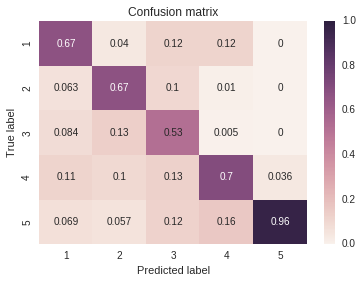

In [62]:
plot_confusion_matrix(confMatrixNorm, classes = availableClasses)

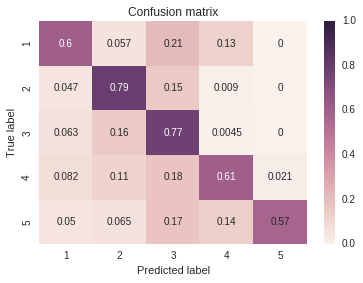

In [66]:
plot_confusion_matrix(howEachClassHasBeenClassified(confmatrix),classes = availableClasses)

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*

Yes the confusion matrix is what it is expected. We see that the predictor has performed fairly well.
Along the diagonal we have the better predictions and this is expected.

From the first figure  
Meaning that the predictions for class1 are really class1 67% of the time.  
And from the predictions of class3 the 10% of them really belong to class2. 

From the second figure  
On the other hand the class1 is predicted as class1 for 60%  
The predictions that class2 is really class2 are much better at 79%.  
While the prediction that class2 to be classified as class5 is zero.

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [72]:
# Your code goes here
Xorig, y_orig = getFeaturesAndOutput(partA, 'class')

print Xorig.shape
print y_orig.shape

clsOrig = MultinomialNB()

clsOrig.fit(Xorig, y_orig)

(2257, 520)
(2257,)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
clsOrig.score(Xorig, y_orig)

0.33495790872840053

### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*

When the outliers are included the probability that we are going to have a particular word (i.e. "pitched") given that the class is 1 is significantly affected by the huge numbers.

Therefore when we want to use these probabilities to make predictions, our predictions are going to have a poor performance

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

In [82]:
# Your code goes here
Xtest, y_test = getFeaturesAndOutput(partB, 'class')
print Xtest.shape
print y_test.shape

classifier.score(Xtest, y_test)

(2227, 520)
(2227,)


0.51414458913336325

In [92]:
confusion_matrix(y_true=y_test, y_pred=classifier.predict(Xtest))

array([[367,   0,   7,   9,   0],
       [190, 147, 112,   4,   0],
       [211,  11, 214,   8,   0],
       [189,   3,  42, 233,   6],
       [172,   0,  45,  73, 184]])

In [85]:
def plotConfusionMatrix(features, output, classes, predictions, byRow = True):
    func = howEachClassHasBeenClassified if byRow else whatClassesAreResponsibleForEachClassification
    
    plot_confusion_matrix(func(
    confusion_matrix(y_true=output, y_pred=predictions)
    ),classes = classes)

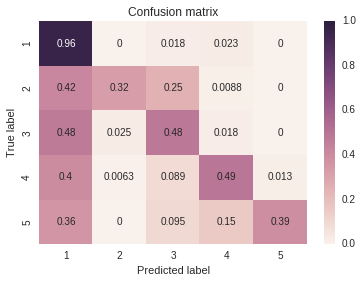

In [86]:
plotConfusionMatrix(features=Xtest,
                    output = y_test,
                    classes = availableClasses,
                    predictions = classifier.predict(Xtest))

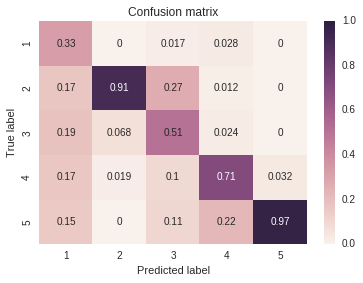

In [87]:
plotConfusionMatrix(features=Xtest,
                    output = y_test,
                    classes = availableClasses,
                    predictions = classifier.predict(Xtest), byRow = False)

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*

Here we see a pattern of a confusion matrix that performs really poorly.

From the first figure we see that even though class1 was correctly predicted as class1 the other classes were predicted as class1. Especially for class2 the 42% of predictions were as class1.

From the second figure we see that the predictions from class1 originate pretty much from all the classes. While the rest of the predictions (for class2, class5 especially) originate from the correct class.

When you are given a true class1 then you are most likely to predict class1 as we see from first figure.  
While the first figure reveals that given that you have predicted class1 then the true class can be anything.

When you are given a true class2 then you might as well predict class1, class3.

Given that you have predicted class5 then you are most likely that the true class will be class5. 

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*

Actually most of the predictions are for class1. The baseline that we could use is that we have the most simplistic classifier that always predicts class1 no matter what.

Meaning that given any datapoint the output will be class1. Therefore this is going to be successful only at the cases were the class is actual class1. 

### ========== Question 2.11 ==========

Estimate the baseline performance.

In [93]:
# Your code goes here
print "printing length for each class on the data set"
print len(y_test[y_test == 1])
print len(y_test[y_test == 2])
print len(y_test[y_test == 3])
print len(y_test[y_test == 4])
print len(y_test[y_test == 5])

print "the accuracy score for class 1 for the most simplified classifier is:"
len(y_test[y_test == 1]) / len(y_test)

printing length for each class on the data set
383
453
444
473
474
the accuracy score for class 1 for the most simplified classifier is:


0.17198024247867086

### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

In [96]:
X_tr, y_tr = getFeaturesAndOutput(cleanData, 'class')
news_B = partB
Xtest, y_ts = getFeaturesAndOutput(partB, 'class')
classes = availableClasses

('Classification accuracy on the test set by using a Random Forest:', 0.69375841939829364)


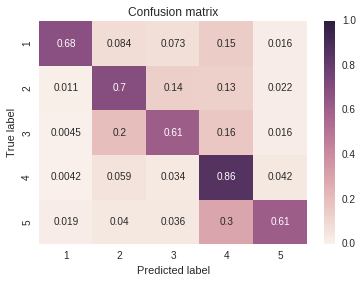

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=X_tr, y=y_tr)
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
print('Classification accuracy on the test set by using a Random Forest:', accuracy_score(y_ts, rf.predict(X=X_ts)))
plt.figure()
cm = confusion_matrix(y_ts, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=classes)

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

*Your answer goes here.*

The accuracy score of 69% of the Random Forest classifier is better than the 51% of our Gaussian Naive Bayer classifier and therefore recommended to be trusted.

The Gaussian Naive Bayer classifier does not perform well enough because using Gaussians to features that might be highly correlated could make them "fall on top of each other" and therefore having difficulty to separate them / classify them properly